# 관련 라이브러리 import

In [343]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [344]:
pd.options.display.max_columns = 30

# 데이터셋 불러오기

In [345]:
df = sns.load_dataset('titanic');
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [346]:
df.shape

(891, 15)

<AxesSubplot:xlabel='embarked', ylabel='fare'>

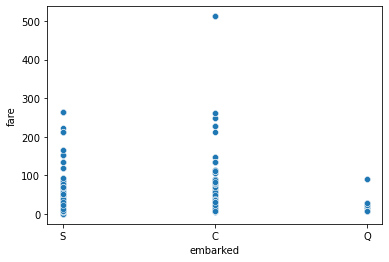

In [347]:
sns.scatterplot(data=df, x='embarked', y='fare')

<AxesSubplot:xlabel='survived', ylabel='count'>

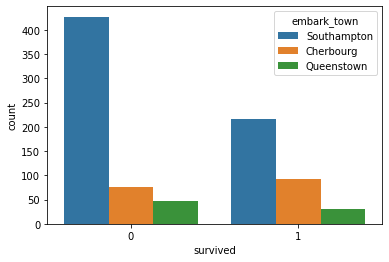

In [348]:
sns.countplot(data=df, x='survived', hue='embark_town')

<AxesSubplot:xlabel='survived', ylabel='count'>

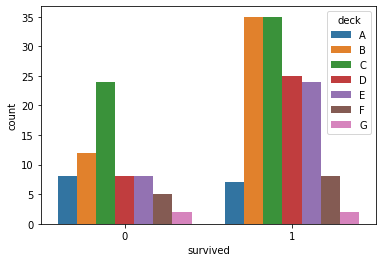

In [349]:
sns.countplot(data=df, x="survived", hue="deck")

In [350]:
df.groupby(by="deck").mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
deck,,,,,,,,
A,0.466667,1.000000,44.833333,0.133333,0.133333,39.623887,0.866667,0.800000
B,0.744681,1.000000,34.955556,0.361702,0.574468,113.505764,0.404255,0.468085
C,0.593220,1.000000,36.086667,0.644068,0.474576,100.151341,0.525424,0.372881
D,0.757576,1.121212,39.032258,0.424242,0.303030,57.244576,0.454545,0.393939
E,0.750000,1.312500,38.116667,0.312500,0.312500,46.026694,0.500000,0.531250
F,0.615385,2.384615,19.954545,0.538462,0.538462,18.696792,0.384615,0.538462
G,0.500000,3.000000,14.750000,0.500000,1.250000,13.581250,0.000000,0.000000


# EDA

### 기술통계값 확인

In [351]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


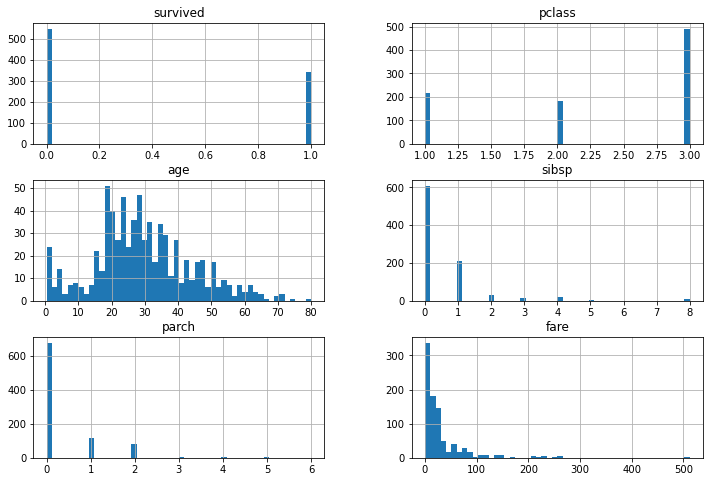

In [352]:

_ = df.hist(figsize = (12, 8), bins = 50)

In [353]:
df.describe(include='object')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


# 범주형->수치형 

### sex male(1), female(2)

In [354]:
df["sex"].unique()

array(['male', 'female'], dtype=object)

In [355]:
df["sex_n"] = 1
df.loc[df["sex"] == "female", "sex_n"] = 2
df["sex_n"]

0      1
1      2
2      2
3      2
4      1
      ..
886    1
887    2
888    2
889    1
890    1
Name: sex_n, Length: 891, dtype: int64

In [356]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_n
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


### embarked nan(0), C(1), Q(2), S(3)

In [357]:
embarked_list = df["embarked"].unique().tolist()
embarked_list.remove(np.nan)
embarked_list.sort()
embarked_list
df["embarked_n"] = 0
for idx, target in enumerate(embarked_list):
    df.loc[df["embarked"] == target, "embarked_n"] = idx+1
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_n,embarked_n
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,3
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,3


### who man(1), woman(2), child(3)

In [358]:
df["who"].unique()

array(['man', 'woman', 'child'], dtype=object)

In [359]:
df["who_n"] = 3
df.loc[df["who"] == "man", "who_n"] = 1
df.loc[df["who"] == "woman", "who_n"] = 2

df.head()
#for idx, target in enumerate(who_list)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_n,embarked_n,who_n
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,3,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,1,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2,3,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,3,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,3,1


# alive no(0), yes(1)

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  sex_n        891 non-null    int64   
 16  embarked_n   891 non-null    int64   
 17  who_n        891 non-null    int64   
dtypes: bool(2), category(2), float

In [361]:
alive_list = df["alive"].unique().tolist()
for idx, target in enumerate(alive_list):
    df.loc[df["alive"] == target,"alive_n"] = int(idx)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_n,embarked_n,who_n,alive_n
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,3,1,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,1,2,1.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2,3,2,1.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,3,2,1.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,3,1,0.0


### deck nan(0), A(1)~G(7)

In [362]:
deck_list = df["deck"].unique().tolist()
deck_list.remove(np.nan)
deck_list.sort()
deck_list

df["deck_n"] = 0
for idx, target in enumerate(deck_list):
    df.loc[df["deck"] == target, "deck_n"] = idx+1
    
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_n,embarked_n,who_n,alive_n,deck_n
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,3,1,0.0,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,1,2,1.0,3
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2,3,2,1.0,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,3,2,1.0,3
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,3,1,0.0,0


### class_n First:1, Second(2), Third(3)

In [363]:
class_list = df["class"].unique().tolist()
class_list.sort()
class_list
for idx, target in enumerate(class_list):
    df.loc[df["class"] == target, "class_n"] = idx+1
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_n,embarked_n,who_n,alive_n,deck_n,class_n
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,3,1,0.0,0,3.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,1,2,1.0,3,1.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2,3,2,1.0,0,3.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,3,2,1.0,3,1.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,3,1,0.0,0,3.0


### downcasting

In [364]:
cols = df.columns.tolist()
rm_cols = ['fare','age', 'sex','embarked', 'class', 'who', 'deck', 'embark_town', 'alive']
for target in rm_cols:
    cols.remove(target)
df_temp = df[cols]



#df_temp["embarked_n"] = df_temp["embarked_n"].astype(int)
for col in cols:
    df_temp[col] = pd.to_numeric(df_temp[col], downcast='unsigned')

df_temp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   survived    891 non-null    uint8
 1   pclass      891 non-null    uint8
 2   sibsp       891 non-null    uint8
 3   parch       891 non-null    uint8
 4   adult_male  891 non-null    bool 
 5   alone       891 non-null    bool 
 6   sex_n       891 non-null    uint8
 7   embarked_n  891 non-null    uint8
 8   who_n       891 non-null    uint8
 9   alive_n     891 non-null    uint8
 10  deck_n      891 non-null    uint8
 11  class_n     891 non-null    uint8
dtypes: bool(2), uint8(10)
memory usage: 10.6 KB


C:\Users\pge08\AppData\Local\Temp\ipykernel_3080\281926489.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[col] = pd.to_numeric(df_temp[col], downcast='unsigned')


In [365]:
refined_df = pd.concat([df_temp, df[["age", "fare"]]], axis=1)
refined_df.head()

,survived,pclass,sibsp,parch,adult_male,alone,sex_n,embarked_n,who_n,alive_n,deck_n,class_n,age,fare
0,0,3,1,0,True,False,1,3,1,0,0,3,22.0,7.2500
1,1,1,1,0,False,False,2,1,2,1,3,1,38.0,71.2833
2,1,3,0,0,False,True,2,3,2,1,0,3,26.0,7.9250
3,1,1,1,0,False,False,2,3,2,1,3,1,35.0,53.1000
4,0,3,0,0,True,True,1,3,1,0,0,3,35.0,8.0500


# train데이터셋 만들기

In [366]:
#train = refined_df[~((refined_df["age"].isnull()) | (refined_df["embarked_n"] == 0)) \
                 #& ~(refined_df["deck_n"] == 0)]
train = refined_df[~(refined_df["age"].isnull()) & ~(refined_df["deck_n"] == 0) & ~(refined_df["embarked_n"]==0)]
train = train.drop_duplicates()
train.shape

(181, 14)

In [367]:
refined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    uint8  
 1   pclass      891 non-null    uint8  
 2   sibsp       891 non-null    uint8  
 3   parch       891 non-null    uint8  
 4   adult_male  891 non-null    bool   
 5   alone       891 non-null    bool   
 6   sex_n       891 non-null    uint8  
 7   embarked_n  891 non-null    uint8  
 8   who_n       891 non-null    uint8  
 9   alive_n     891 non-null    uint8  
 10  deck_n      891 non-null    uint8  
 11  class_n     891 non-null    uint8  
 12  age         714 non-null    float64
 13  fare        891 non-null    float64
dtypes: bool(2), float64(2), uint8(10)
memory usage: 24.5 KB


### deck 0 688개 비율에 맞게 지정

In [368]:
t = refined_df[~(refined_df["deck_n"] == 0)]["deck_n"].value_counts(normalize=True).sort_index()

#t.values
t
deck = np.random.choice(a=t.index, size=688, p=t.values)
refined_df.loc[refined_df["deck_n"] == 0, "deck_n"] = deck
#refined_df.loc[refined_df["deck_n"] == 0, "deck_n"].size
#refined_df["deck_n"]
#refined_df.head()
#deck
refined_df.deck_n.value_counts()

3    270
2    216
5    156
4    146
1     55
6     40
7      8
Name: deck_n, dtype: int64

### age 중위값 넣기

In [369]:
refined_df["age"] = refined_df["age"].fillna(refined_df["age"].describe()["50%"])

In [370]:
refined_df["age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

### embarked 0값 2개 처리

In [371]:
#refined_df.loc[(refined_df["embarked_n"] == 0)] = 3
refined_df["embarked_n"].value_counts()

3    644
1    168
2     77
0      2
Name: embarked_n, dtype: int64

# test셋 만들기

In [372]:
test = refined_df.loc[refined_df.index.delete(train.index)]

In [373]:
test = test.drop_duplicates()
test.shape

(669, 14)

# refined_df로 추정

In [374]:
label_name = 'survived'
feature_names = refined_df.columns.tolist()
feature_names.remove(label_name)
feature_names.remove('alive_n')
feature_names

['pclass',
 'sibsp',
 'parch',
 'adult_male',
 'alone',
 'sex_n',
 'embarked_n',
 'who_n',
 'deck_n',
 'class_n',
 'age',
 'fare']

### 학습

In [375]:
X_train = train[feature_names]
y_train = train[label_name]

X_test = test[feature_names]
y_test = test[label_name]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((181, 12), (181,), (669, 12), (669,))

In [394]:


max_depth = np.random.choice(range(2, 20), 10, replace=False)
max_depth

max_features = np.random.uniform(0.1, 0.9, 10)
max_features

array([0.48975435, 0.36371368, 0.25738508, 0.51563422, 0.14823308,
       0.40512705, 0.21158862, 0.78930653, 0.86585279, 0.26055372])

In [395]:
model = DecisionTreeClassifier(random_state=31)
parameters = {'max_depth': max_depth, 'max_features': max_features}
clf = GridSearchCV(model, param_grid = parameters, n_jobs=-1, cv=7)
clf.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(random_state=31), n_jobs=-1,
             param_grid={'max_depth': array([11, 15,  2,  3,  5, 10, 12,  6,  8, 19]),
                         'max_features': array([0.48975435, 0.36371368, 0.25738508, 0.51563422, 0.14823308,
       0.40512705, 0.21158862, 0.78930653, 0.86585279, 0.26055372])})

In [396]:
clf.best_score_

0.774065934065934

In [397]:
clf.best_params_

{'max_depth': 2, 'max_features': 0.4897543540916147}

In [399]:
model = DecisionTreeClassifier(random_state=31, max_depth=2, max_features=0.48)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_features=0.48, random_state=31)

In [400]:
y_predict = model.predict(X_test)
(y_test == y_predict).mean()

0.7817638266068759

# ------------------------------------------------------------

### 왜 alive_n이 들어가면 100%가 되지..?

In [382]:
target_label = "survived"
feature_labels = refined_df.columns.tolist()
feature_labels.remove(target_label)
feature_labels

['pclass',
 'sibsp',
 'parch',
 'adult_male',
 'alone',
 'sex_n',
 'embarked_n',
 'who_n',
 'alive_n',
 'deck_n',
 'class_n',
 'age',
 'fare']

In [383]:
X_train_ = train[feature_labels]
y_train_ = train[target_label]

X_test_ = test[feature_labels]
y_test_ = test[target_label]

X_train_.shape, y_train_.shape, X_test_.shape, y_test_.shape

((181, 13), (181,), (669, 13), (669,))

0

0

In [384]:
max_depth = np.random.choice(range(2, 20), 10, replace=False)
max_depth

max_features = np.random.uniform(0.1, 0.9, 10)
max_features

array([0.37940901, 0.87070492, 0.71883832, 0.83317568, 0.79912256,
       0.56431631, 0.43499928, 0.55232904, 0.65428002, 0.54742491])

In [403]:
model = DecisionTreeClassifier(random_state=31)
parameters = {'max_depth': max_depth, 'max_features': max_features}
clf = GridSearchCV(model, param_grid = parameters, n_jobs=-1, cv=7)
clf.fit(X_train_, y_train_)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(random_state=31), n_jobs=-1,
             param_grid={'max_depth': array([11, 15,  2,  3,  5, 10, 12,  6,  8, 19]),
                         'max_features': array([0.48975435, 0.36371368, 0.25738508, 0.51563422, 0.14823308,
       0.40512705, 0.21158862, 0.78930653, 0.86585279, 0.26055372])})

In [404]:
clf.best_score_

1.0

In [405]:
clf.best_params_

{'max_depth': 11, 'max_features': 0.4897543540916147}

In [433]:
model=DecisionTreeClassifier(random_state=14, max_depth=11, max_features=0.489)
model.fit(X_train_, y_train_)

DecisionTreeClassifier(max_depth=11, max_features=0.489, random_state=14)

In [434]:
y_predict_ = model.predict(X_test_)
(y_test_ == y_predict_).mean()

0.9895366218236173